In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [12]:
(x_train,y_train), (x_test,y_test)=datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [3]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
classes[9]

'truck'

In [8]:
def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])


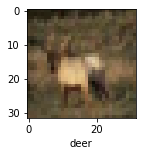

In [9]:
plot_sample(x_train, y_train, 3)

In [10]:
y_train.shape

(50000,)

In [15]:
x_train = x_train / 255
x_test = x_test / 255

In [18]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid')
]
)
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)
ann.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 117s 63ms/step - loss: 2.3026 - accuracy: 0.0990
Epoch 2/5
1563/1563 [==============================] - 98s 62ms/step - loss: 2.3027 - accuracy: 0.0984
Epoch 3/5
1563/1563 [==============================] - 99s 63ms/step - loss: 2.3026 - accuracy: 0.0998
Epoch 4/5
1563/1563 [==============================] - 102s 65ms/step - loss: 2.3027 - accuracy: 0.0985
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 2.3027 - accuracy: 0.1004


In [19]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 2.3025 - accuracy: 0.1000


[2.3025102615356445, 0.10000000149011612]

In [23]:
cnn=models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
]
)
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
)
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 60s 28ms/step - loss: 2.3028 - accuracy: 0.1002
Epoch 2/10
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3027 - accuracy: 0.10160s - loss: 2.3027 - accuracy: 
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 2.3027 - accuracy: 0.1014
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 2.3027 - accuracy: 0.0980
Epoch 6/10
1563/1563 [==============================] - 37s 23ms/step - loss: 2.3027 - accuracy: 0.0993
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3028 - accuracy: 0.0985
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.3027 - accuracy: 0.0994
Epoch 9/10
1563/1563 [==============================] - 38s 24ms/step - loss: 2.3027 - accuracy: 0.1013
Epoch 10/10
1563/1563 [===========

In [24]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3027 - accuracy: 0.1000


[2.3026537895202637, 0.10000000149011612]

In [25]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

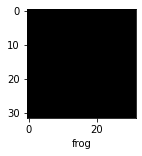

In [27]:
plot_sample(x_test, y_test, 5)

In [28]:
y_pred=cnn.predict(x_test)
y_pred[:5]

array([[0.09899776, 0.09922487, 0.09908881, 0.09962153, 0.10042638,
        0.10108988, 0.10231347, 0.10122448, 0.0983445 , 0.09966833],
       [0.09899776, 0.09922487, 0.09908881, 0.09962153, 0.10042638,
        0.10108988, 0.10231347, 0.10122448, 0.0983445 , 0.09966833],
       [0.09899776, 0.09922487, 0.09908881, 0.09962153, 0.10042638,
        0.10108988, 0.10231347, 0.10122448, 0.0983445 , 0.09966833],
       [0.09899776, 0.09922487, 0.09908881, 0.09962153, 0.10042638,
        0.10108988, 0.10231347, 0.10122448, 0.0983445 , 0.09966833],
       [0.09899776, 0.09922487, 0.09908881, 0.09962153, 0.10042638,
        0.10108988, 0.10231347, 0.10122448, 0.0983445 , 0.09966833]],
      dtype=float32)

In [37]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:10]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [36]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

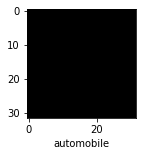

In [38]:
plot_sample(x_test, y_test, 9)

In [39]:
classes[y_classes[9]]

'frog'